# Data anaylsis in cerebellar granular layer simulations
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCGrC/SimulationConfigAll.cfg'
simulation_time = 1200.0
network_state_name = './results/GoCGrC/network01_20mf_all_learning_step_'
save_network_step = 100.0
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Initialize the simulation

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['activity_recording_step'] = 100.0
simulation.config_options['simulation']['activity_recording_file'] = 'results/GoCGrC/activity01_20mf_all_learning.h5'
simulation.config_options['network']['load_file'] = None
simulation.config_options['network']['save_file'] = network_state_name + '0.h5'
simulation.config_options['stimulation']['load_pattern_file'] = './results/GoCGrC/stimulation_all.h5'
simulation.config_options['stimulation']['save_pattern_file'] = './results/GoCGrC/stimulation_all_vis.h5'
simulation.config_options['mflayer']['register_activity'] = True
simulation.config_options['grclayer']['register_activity'] = True
simulation.config_options['goclayer']['register_activity'] = True
simulation.config_options['grclayer']['save_state_vars'] = 'Vth'
simulation.config_options['goclayer']['save_state_vars'] = 'Vth'
simulation.initialize()

# Save the generated stimulation
pattern_generator = simulation.pattern_generator
bin_length,_ = pattern_generator.get_all_patterns()
bin_id_pattern = pattern_generator.pattern_id_index
pattern_in_bin = numpy.zeros((bin_length.size,bin_id_pattern.size),dtype=bool)
for idp,active_bins in enumerate(bin_id_pattern):
    pattern_in_bin[active_bins,idp] = True

filename = pattern_generator.save_pattern_file    
import h5py
with h5py.File(filename, 'a') as file:
            
    # Save bin_length
    print 'Writing bin length array'
    bin_length_dataset = file.create_dataset('bin_length', data = bin_length.T)
    print 'Writing pattern activation array'
    pattern_in_bin = file.create_dataset('pattern_activation', data = pattern_in_bin)
    
    file.flush()

2016-12-27 20:32:37,262 - P22003 - MemTotal:62M - Simulation - DEBUG: Simulation time fixed to 1200.0s
2016-12-27 20:32:37,295 - P22003 - MemTotal:62M - Simulation - DEBUG: Creating cerebellum generator
2016-12-27 20:32:37,453 - P22003 - MemTotal:73M - Simulation - DEBUG: Initializing cerebellum generator
2016-12-27 20:32:37,456 - P22003 - MemTotal:73M - Simulation - DEBUG: Cerebellar simulation initialized
2016-12-27 20:32:37,473 - P22003 - MemTotal:74M - Simulation - DEBUG: NEST module loaded
2016-12-27 20:32:37,493 - P22003 - MemTotal:78M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2016-12-27 20:32:37,496 - P22003 - MemTotal:78M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2016-12-27 20:32:37,499 - P22003 - MemTotal:78M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2016-12-27 20:32:37,502 - P22003 - MemTotal:78M - Simulation - WARNIN

./src/SpikingSimulation/SpikingCerebellum/SynapticLayerNoMPI.py:564: RuntimeWarning: invalid value encountered in divide


2016-12-27 20:32:42,335 - P22003 - MemTotal:206M - Simulation - DEBUG: Generated glomerulus-like connections in layer gocgrcsynapsis (1 of 1). Local: 66
2016-12-27 20:32:42,344 - P22003 - MemTotal:207M - Simulation - DEBUG: Generated glomerulus-like connections in layer gocgrcsynapsis. Local: 14877
2016-12-27 20:32:42,363 - P22003 - MemTotal:179M - Simulation - DEBUG: Generated connections in layer gocgocsynapsis (1 of 1). Local: 81
2016-12-27 20:32:42,367 - P22003 - MemTotal:179M - Simulation - INFO: Saving network to hdf5 file ./results/GoCGrC/network01_20mf_all_learning_step_0.h5
2016-12-27 20:32:42,576 - P22003 - MemTotal:183M - Simulation - DEBUG: Writing neuron layer mflayer
2016-12-27 20:32:42,582 - P22003 - MemTotal:184M - Simulation - DEBUG: Writing neuron layer grclayer
2016-12-27 20:32:42,587 - P22003 - MemTotal:184M - Simulation - DEBUG: Writing neuron layer goclayer
2016-12-27 20:32:42,594 - P22003 - MemTotal:184M - Simulation - DEBUG: Writing neuron layer mfgrcsynapsis
20

/Users/jgarrido/NEST/nest210/ins_nompi/lib/python2.7/site-packages/nest/lib/hl_api_helper.py:61: UserWarning: 
OneToOneConnect is deprecated and will be removed in a future version of NEST.
Please use Connect instead!
For details, see http://www.nest-simulator.org/connection_management                       


2016-12-27 20:32:46,872 - P22003 - MemTotal:191M - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgrcsynapsis: 80133
2016-12-27 20:32:46,961 - P22003 - MemTotal:192M - Simulation - DEBUG: Nest Process: 0. Connections created in layer mfgocsynapsis: 1941
2016-12-27 20:32:48,421 - P22003 - MemTotal:194M - Simulation - DEBUG: Nest Process: 0. Connections created in layer grcgocsynapsis: 35917
2016-12-27 20:32:49,021 - P22003 - MemTotal:187M - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgrcsynapsis: 14877
2016-12-27 20:32:49,026 - P22003 - MemTotal:187M - Simulation - DEBUG: Nest Process: 0. Connections created in layer gocgocsynapsis: 81
2016-12-27 20:32:51,689 - P22003 - MemTotal:209M - Simulation - DEBUG: Creating hdf5 activity file results/GoCGrC/activity01_20mf_all_learning.h5
2016-12-27 20:32:51,691 - P22003 - MemTotal:209M - Simulation - DEBUG: Creating group layer mflayer
2016-12-27 20:32:51,694 - P22003 - MemTotal:209M - Simulation - D

Writing bin length array
Writing pattern activation array


Visualize the simulation or only run it.

In [4]:
for sim_time_step in numpy.arange(save_network_step,simulation_time,save_network_step):
    simulation.cerebellum.save_file = network_state_name + str(sim_time_step) + '.h5'
    simulation.run_simulation(end_time=sim_time_step)
    simulation.cerebellum.update_network_weights()
    print 'Saving network state to file',simulation.cerebellum.save_file
    simulation.cerebellum.save_network()

2016-12-27 20:32:52,742 - P22003 - MemTotal:302M - Simulation - INFO: Running the simulation from 0.0s until time 100.0s
2016-12-27 20:32:52,755 - P22003 - MemTotal:304M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2016-12-27 20:32:54,678 - P22003 - MemTotal:304M - Simulation - DEBUG: Simulation time is 1.91585016251 seconds. Real-time rate: 0.0923871832276. Spike frequency: 0.0861581920904
2016-12-27 20:32:54,688 - P22003 - MemTotal:304M - Simulation - DEBUG: Running the simulation 0.113s until 0.29s
2016-12-27 20:32:56,034 - P22003 - MemTotal:304M - Simulation - DEBUG: Simulation time is 1.3419919014 seconds. Real-time rate: 0.0842031907065. Spike frequency: 0.0398230088496
2016-12-27 20:32:56,046 - P22003 - MemTotal:305M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2016-12-27 20:33:03,023 - P22003 - MemTotal:305M - Simulation - DEBUG: Simulation time is 6.97377490997 seconds. Real-time rate: 0.101809996618. Spike frequency: 0.125
2016-12-27 20

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_100.0.h5


2016-12-27 20:46:52,117 - P22003 - MemTotal:421M - Simulation - DEBUG: Simulation time is 1.70488595963 seconds. Real-time rate: 0.190628586132. Spike frequency: 1.68153846154
2016-12-27 20:46:52,122 - P22003 - MemTotal:421M - Simulation - DEBUG: Running the simulation 1.134s until 101.459s
2016-12-27 20:46:55,689 - P22003 - MemTotal:423M - Simulation - DEBUG: Simulation time is 3.55928301811 seconds. Real-time rate: 0.189644935951. Spike frequency: 0.95
2016-12-27 20:46:59,469 - P22003 - MemTotal:426M - Simulation - DEBUG: Simulation time is 2.27249002457 seconds. Real-time rate: 0.201981084642. Spike frequency: 1.31862745098
2016-12-27 20:46:59,474 - P22003 - MemTotal:426M - Simulation - DEBUG: Running the simulation 0.081s until 101.54s
2016-12-27 20:46:59,912 - P22003 - MemTotal:426M - Simulation - DEBUG: Simulation time is 0.433409929276 seconds. Real-time rate: 0.186890042264. Spike frequency: 0.0648148148148
2016-12-27 20:46:59,917 - P22003 - MemTotal:426M - Simulation - DEBUG: 

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_200.0.h5


2016-12-27 20:58:10,561 - P22003 - MemTotal:491M - Simulation - DEBUG: Simulation time is 0.297507047653 seconds. Real-time rate: 0.188230835006. Spike frequency: 8.45535714287
2016-12-27 20:58:10,565 - P22003 - MemTotal:491M - Simulation - DEBUG: Running the simulation 0.342s until 200.398s
2016-12-27 20:58:12,253 - P22003 - MemTotal:507M - Simulation - DEBUG: Simulation time is 1.65259003639 seconds. Real-time rate: 0.206947877253. Spike frequency: 2.21783625731
2016-12-27 20:58:12,257 - P22003 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.543s until 200.941s
2016-12-27 20:58:15,078 - P22003 - MemTotal:520M - Simulation - DEBUG: Simulation time is 2.77929496765 seconds. Real-time rate: 0.195373289385. Spike frequency: 3.89502762431
2016-12-27 20:58:15,083 - P22003 - MemTotal:520M - Simulation - DEBUG: Running the simulation 0.067s until 201.008s
2016-12-27 20:58:15,439 - P22003 - MemTotal:520M - Simulation - DEBUG: Simulation time is 0.312728881836 seconds. Real-time

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_300.0.h5


2016-12-27 21:09:42,206 - P22003 - MemTotal:627M - Simulation - DEBUG: Simulation time is 2.73025798798 seconds. Real-time rate: 0.192289520738. Spike frequency: 8.15190476191
2016-12-27 21:09:42,212 - P22003 - MemTotal:598M - Simulation - DEBUG: Running the simulation 0.845s until 301.37s
2016-12-27 21:09:45,116 - P22003 - MemTotal:665M - Simulation - DEBUG: Simulation time is 2.74828290939 seconds. Real-time rate: 0.17283519043. Spike frequency: 6.42684210526
2016-12-27 21:09:48,511 - P22003 - MemTotal:655M - Simulation - DEBUG: Simulation time is 1.80040407181 seconds. Real-time rate: 0.205509421909. Spike frequency: 6.01283783784
2016-12-27 21:09:48,516 - P22003 - MemTotal:655M - Simulation - DEBUG: Running the simulation 0.123s until 301.493s
2016-12-27 21:09:49,282 - P22003 - MemTotal:708M - Simulation - DEBUG: Simulation time is 0.635352134705 seconds. Real-time rate: 0.19359343155. Spike frequency: 7.86788617886
2016-12-27 21:09:49,286 - P22003 - MemTotal:708M - Simulation - DE

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_400.0.h5


2016-12-27 21:22:12,444 - P22003 - MemTotal:790M - Simulation - DEBUG: Simulation time is 5.32814693451 seconds. Real-time rate: 0.187682511817. Spike frequency: 7.433
2016-12-27 21:22:15,775 - P22003 - MemTotal:839M - Simulation - DEBUG: Simulation time is 1.56894612312 seconds. Real-time rate: 0.204595935621. Spike frequency: 8.47274143302
2016-12-27 21:22:15,779 - P22003 - MemTotal:839M - Simulation - DEBUG: Running the simulation 0.011s until 401.332s
2016-12-27 21:22:15,989 - P22003 - MemTotal:839M - Simulation - DEBUG: Simulation time is 0.0552730560303 seconds. Real-time rate: 0.199011974189. Spike frequency: 2.15909090909
2016-12-27 21:22:15,994 - P22003 - MemTotal:839M - Simulation - DEBUG: Running the simulation 0.29s until 401.622s
2016-12-27 21:22:17,687 - P22003 - MemTotal:975M - Simulation - DEBUG: Simulation time is 1.45502400398 seconds. Real-time rate: 0.199309426653. Spike frequency: 6.48620689655
2016-12-27 21:22:17,691 - P22003 - MemTotal:975M - Simulation - DEBUG: 

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_500.0.h5


2016-12-27 21:38:00,132 - P22003 - MemTotal:917M - Simulation - DEBUG: Simulation time is 0.412343025208 seconds. Real-time rate: 0.174611902224. Spike frequency: 5.74305555552
2016-12-27 21:38:00,136 - P22003 - MemTotal:917M - Simulation - DEBUG: Running the simulation 0.052s until 500.124s
2016-12-27 21:38:00,620 - P22003 - MemTotal:917M - Simulation - DEBUG: Simulation time is 0.261162042618 seconds. Real-time rate: 0.199110098385. Spike frequency: 0.341346153846
2016-12-27 21:38:00,624 - P22003 - MemTotal:917M - Simulation - DEBUG: Running the simulation 0.486s until 500.61s
2016-12-27 21:38:03,359 - P22003 - MemTotal:1092M - Simulation - DEBUG: Simulation time is 2.41571784019 seconds. Real-time rate: 0.201182436091. Spike frequency: 5.11934156379
2016-12-27 21:38:03,363 - P22003 - MemTotal:1092M - Simulation - DEBUG: Running the simulation 0.347s until 500.957s
2016-12-27 21:38:05,588 - P22003 - MemTotal:1040M - Simulation - DEBUG: Simulation time is 1.84863400459 seconds. Real-t

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_600.0.h5


2016-12-27 21:57:22,512 - P22003 - MemTotal:1026M - Simulation - DEBUG: Simulation time is 0.315362930298 seconds. Real-time rate: 0.104641341232. Spike frequency: 0.984848484811
2016-12-27 21:57:22,519 - P22003 - MemTotal:1026M - Simulation - DEBUG: Running the simulation 0.542s until 600.575s
2016-12-27 21:57:28,173 - P22003 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 5.12980985641 seconds. Real-time rate: 0.10565693762. Spike frequency: 4.40129151291
2016-12-27 21:57:28,179 - P22003 - MemTotal:1238M - Simulation - DEBUG: Running the simulation 0.16s until 600.735s
2016-12-27 21:57:30,139 - P22003 - MemTotal:1174M - Simulation - DEBUG: Simulation time is 1.45190095901 seconds. Real-time rate: 0.110200354237. Spike frequency: 3.090625
2016-12-27 21:57:30,145 - P22003 - MemTotal:1174M - Simulation - DEBUG: Running the simulation 0.272s until 601.007s
2016-12-27 21:57:33,023 - P22003 - MemTotal:1238M - Simulation - DEBUG: Simulation time is 2.40780091286 seconds. Real-time

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_700.0.h5


2016-12-27 22:21:32,839 - P22003 - MemTotal:1129M - Simulation - DEBUG: Simulation time is 2.27418804169 seconds. Real-time rate: 0.173248646453. Spike frequency: 3.5450507614
2016-12-27 22:21:32,843 - P22003 - MemTotal:1129M - Simulation - DEBUG: Running the simulation 0.078s until 700.472s
2016-12-27 22:21:33,653 - P22003 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.42741394043 seconds. Real-time rate: 0.182492877798. Spike frequency: 6.35897435898
2016-12-27 22:21:33,657 - P22003 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.593s until 701.065s
2016-12-27 22:21:36,997 - P22003 - MemTotal:1375M - Simulation - DEBUG: Simulation time is 2.90129208565 seconds. Real-time rate: 0.181987881403. Spike frequency: 3.30113636365
2016-12-27 22:21:39,209 - P22003 - MemTotal:1089M - Simulation - DEBUG: Simulation time is 0.328696966171 seconds. Real-time rate: 0.197750532228. Spike frequency: 5.26538461521
2016-12-27 22:21:39,212 - P22003 - MemTotal:1089M - Simula

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_800.0.h5


2016-12-27 22:39:36,775 - P22003 - MemTotal:1175M - Simulation - DEBUG: Simulation time is 1.113904953 seconds. Real-time rate: 0.174162076827. Spike frequency: 4.70231958757
2016-12-27 22:39:36,779 - P22003 - MemTotal:1175M - Simulation - DEBUG: Running the simulation 0.042s until 800.236s
2016-12-27 22:39:37,425 - P22003 - MemTotal:1175M - Simulation - DEBUG: Simulation time is 0.194391965866 seconds. Real-time rate: 0.216058311942. Spike frequency: 1.02380952381
2016-12-27 22:39:37,429 - P22003 - MemTotal:1175M - Simulation - DEBUG: Running the simulation 0.6s until 800.836s
2016-12-27 22:39:41,341 - P22003 - MemTotal:1463M - Simulation - DEBUG: Simulation time is 3.2547659874 seconds. Real-time rate: 0.184345050404. Spike frequency: 4.2225
2016-12-27 22:39:41,347 - P22003 - MemTotal:1463M - Simulation - DEBUG: Running the simulation 0.374s until 801.21s
2016-12-27 22:39:43,022 - P22003 - MemTotal:1456M - Simulation - DEBUG: Simulation time is 1.00046491623 seconds. Real-time rate: 

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_900.0.h5


2016-12-27 22:57:07,180 - P22003 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.347280025482 seconds. Real-time rate: 0.204445965195. Spike frequency: 4.55281690123
2016-12-27 22:57:07,184 - P22003 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.258s until 900.329s
2016-12-27 22:57:08,955 - P22003 - MemTotal:1600M - Simulation - DEBUG: Simulation time is 1.17456102371 seconds. Real-time rate: 0.219656531071. Spike frequency: 4.48255813953
2016-12-27 22:57:08,959 - P22003 - MemTotal:1600M - Simulation - DEBUG: Running the simulation 0.322s until 900.651s
2016-12-27 22:57:11,054 - P22003 - MemTotal:1603M - Simulation - DEBUG: Simulation time is 1.4777238369 seconds. Real-time rate: 0.217902690584. Spike frequency: 3.13121118012
2016-12-27 22:57:11,058 - P22003 - MemTotal:1603M - Simulation - DEBUG: Running the simulation 0.029s until 900.68s
2016-12-27 22:57:11,785 - P22003 - MemTotal:1603M - Simulation - DEBUG: Simulation time is 0.133686065674 seconds. Real

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_1000.0.h5


2016-12-27 23:12:43,404 - P22003 - MemTotal:1335M - Simulation - DEBUG: Simulation time is 0.445225000381 seconds. Real-time rate: 0.204391038071. Spike frequency: 5.39285714268
2016-12-27 23:12:43,408 - P22003 - MemTotal:1335M - Simulation - DEBUG: Running the simulation 0.264s until 1000.355s
2016-12-27 23:12:45,250 - P22003 - MemTotal:1689M - Simulation - DEBUG: Simulation time is 1.22141695023 seconds. Real-time rate: 0.21614240735. Spike frequency: 3.34659090909
2016-12-27 23:12:45,254 - P22003 - MemTotal:1689M - Simulation - DEBUG: Running the simulation 0.029s until 1000.384s
2016-12-27 23:12:45,897 - P22003 - MemTotal:1689M - Simulation - DEBUG: Simulation time is 0.122760057449 seconds. Real-time rate: 0.236233190197. Spike frequency: 0.0
2016-12-27 23:12:45,901 - P22003 - MemTotal:1689M - Simulation - DEBUG: Running the simulation 0.319s until 1000.703s
2016-12-27 23:12:48,090 - P22003 - MemTotal:1798M - Simulation - DEBUG: Simulation time is 1.43880486488 seconds. Real-time 

Saving network state to file ./results/GoCGrC/network01_20mf_all_learning_step_1100.0.h5


## GrC activity analysis

Calculate the average firing frequency of each granular cells during the ending 100 seconds

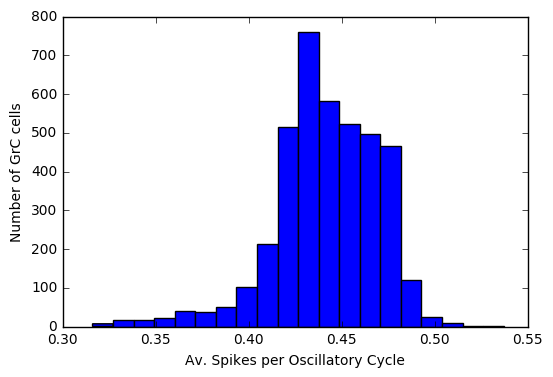

In [5]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the granular cells

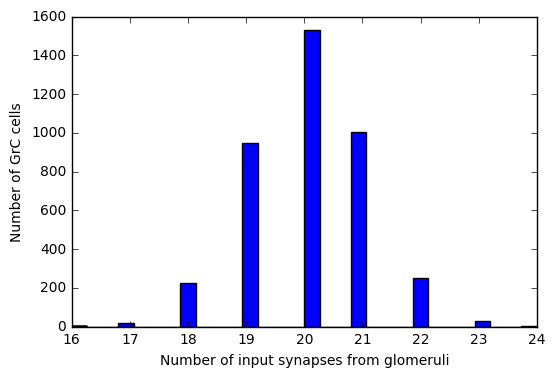

In [6]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['grclayer'].number_of_neurons
number_of_inputs = numpy.bincount(target_cell_index)
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of input synapses from glomeruli')


Plot the histogram of non-zero weights between MF and GrC

Number of active synapses MF-GrC: 8619


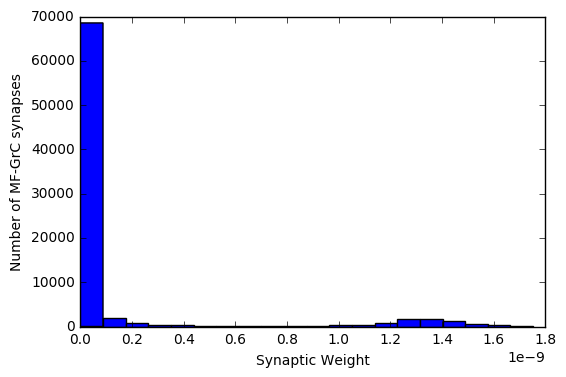

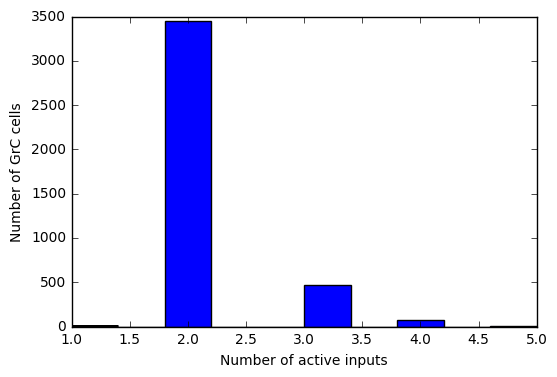

In [7]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.xlabel('Synaptic Weight')
plt.ylabel('Number of MF-GrC synapses')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 2358
Number of active MF-GrC synapses also included in pattern 1 : 3196
Number of active MF-GrC synapses also included in pattern 2 : 2170
Number of active MF-GrC synapses also included in pattern 3 : 2329


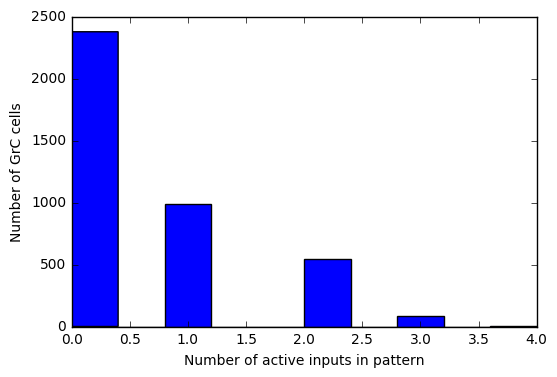

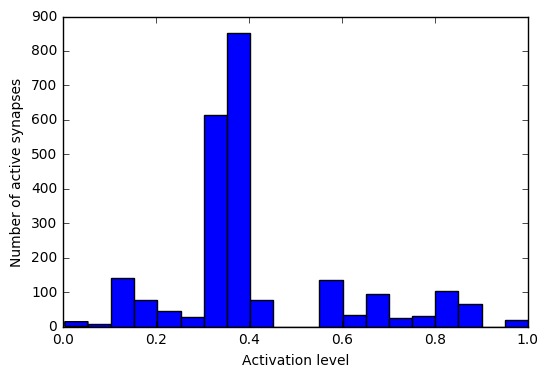

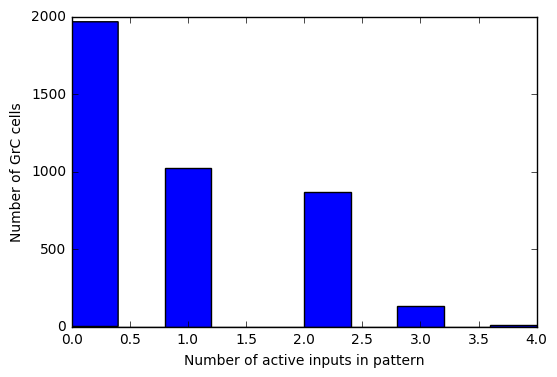

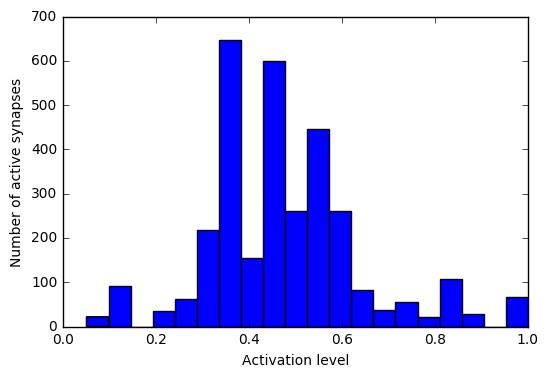

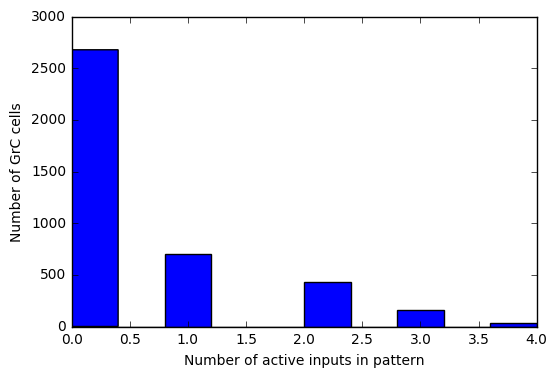

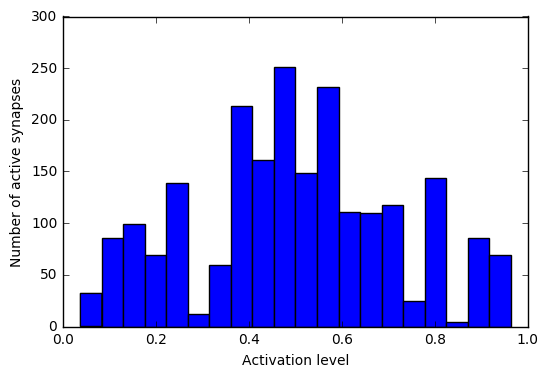

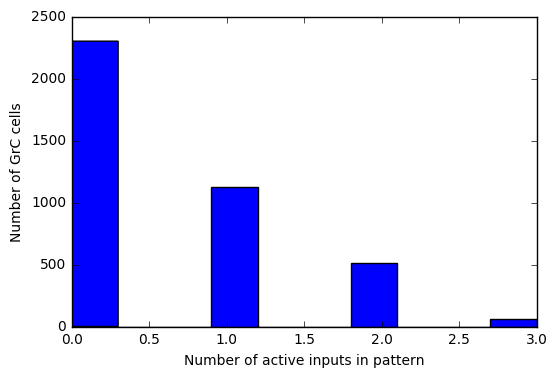

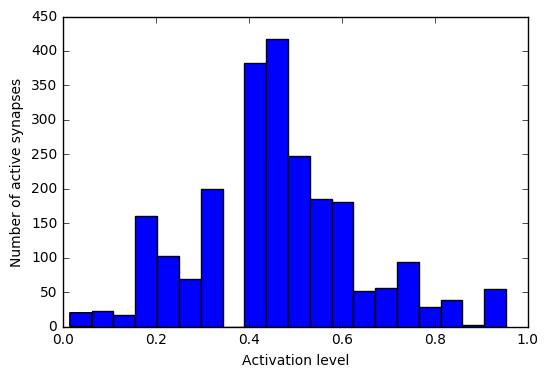

In [8]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

Define some auxiliar functions:

In [9]:
def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    faa_matrix = numpy.empty((len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
               
    any_pattern = numpy.any(pattern_present, axis=0)
    for index_cell, firing in enumerate(cell_firing):
        faa_matrix[index_cell] = numpy.count_nonzero(firing&~any_pattern)/float(numpy.count_nonzero(~any_pattern))
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix

def analyze_activity(layer, window_length, time_bin):

    cell_index = range(simulation.cerebellum.get_number_of_elements(layer=layer))
    pattern_generator = simulation.pattern_generator
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    total_time = pattern_generator.simulation_time
    bin_time_init = numpy.linspace(0.0, window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(time_bin,window_length,num=window_length*inv_time_bin)

    # Initialize a matrix
    pattern_index = range(0,pattern_generator.number_of_patterns)
    num_patterns = len(pattern_index)
    num_bins = len(bin_time_init)
    num_cells = len(cell_index)

    # Calculate the time of each pattern interval
    time_end_of_pattern = pattern_generator.pattern_length_cum
    time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

    # Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
    bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
    if (bin_end_of_pattern[-1]>=num_bins):
        bin_end_of_pattern[-1]=num_bins-1
    bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
    if (bin_init_of_pattern[-1]>=num_bins):
        bin_init_of_pattern[-1]=num_bins-1

    # Final matrix indicating which bins are considered of each pattern
    bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
    bin_is_pattern[:,:] = False
    bin_pattern = numpy.zeros(num_bins)

    # Final matrix indicating which bins are registered spikes
    bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
    bin_has_fired[:,:] = False

    for key, value in enumerate(pattern_index):
        time_of_pattern_in_bin = numpy.zeros(num_bins)
        for index in pattern_generator.pattern_id_index[value]:
            init_bin = bin_init_of_pattern[index]
            end_bin = bin_end_of_pattern[index]

            list_of_bins = range(init_bin,end_bin+1)

            # Add the time of the initial bin (if exists)
            if init_bin!=end_bin:
                time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

            # Add the time of the intermediate bins (if exist)
            time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

            # Add the time of the final bin
            time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

        # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
        bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
        bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    # Create a map of cells to index
    cell_map = dict()
    for key, value in enumerate(cell_index):
        cell_map[value] = key

    # Load data from the data provider
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = layer, init_time = 0.0, end_time = window_length)


    spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

    av_firing_rate = float(len(gtime))/(len(cell_index)*(window_length))
    print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'

    cell_index = numpy.array([cell_map[value] for value in gcell_id])

    # Final matrix indicating which bins are registered spikes
    if len(spike_bin_index) and len(cell_index):
        bin_has_fired[cell_index,spike_bin_index] = True

    # Calculate mutual information in the time window
    init_bin = int(0 * inv_time_bin)
    end_bin = int(window_length * inv_time_bin)


    # Calculate hit matrix for each pattern
    cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

    return cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix

Represent the hit rate matrix of each GrC to each pattern

Average firing rate in MI analysis: 3.53219770833 Hz


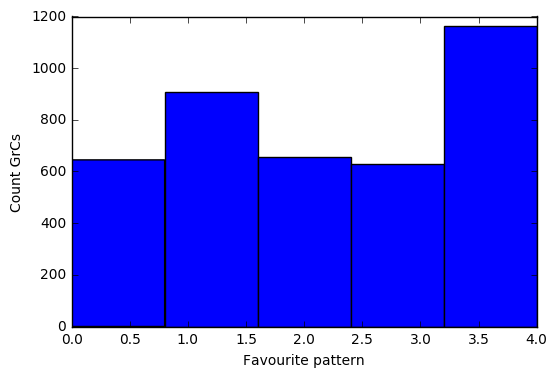

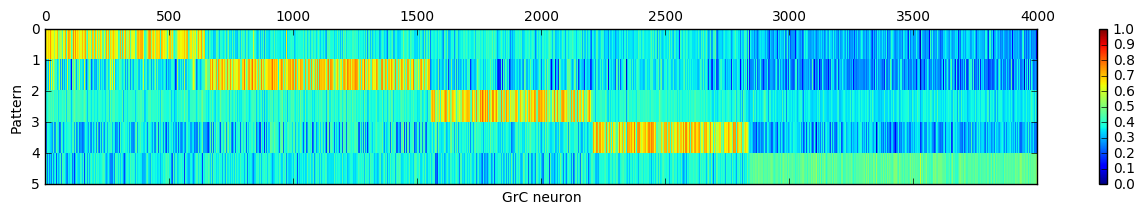

In [10]:
layer = 'grclayer'
window_length = simulation.config_options['hit_analysis']['window_length'] = simulation_time
time_bin = simulation.config_options['hit_analysis']['time_bin'] = 0.125

cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = analyze_activity(layer, window_length, time_bin)

#numpy.set_printoptions(threshold=numpy.nan)
#print 'Individual pattern hit matrix:'
#print hit_matrix
#print 'Individual pattern correct rejection matrix:'
#print cr_matrix
#print 'Individual pattern miss matrix:'
#print miss_matrix
#print 'Individual pattern false alarm matrix:'
#print fa_matrix
#print 'All patterns false alarm array:'
#print faa_matrix

extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)
plt.figure()
plt.hist(selected_pattern, bins=simulation.pattern_generator.number_of_patterns+1)
plt.ylabel('Count GrCs')
plt.xlabel('Favourite pattern')
cell_sorted = numpy.argsort(selected_pattern)
plt.figure()
plt.matshow(extended_hit[:,cell_sorted], extent=[0,simulation.cerebellum.get_number_of_elements(layer=layer),
                                                 simulation.pattern_generator.number_of_patterns+1,0], 
            vmin=0, vmax=1.0, aspect='auto')
plt.ylabel('Pattern')
plt.xlabel('GrC neuron')
plt.colorbar()

Estimate the goodness of the matrix

In [11]:
extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)

# Select those cells mainly responding to one of the patterns
ind = numpy.where(selected_pattern<simulation.pattern_generator.number_of_patterns)

diagonal = hit_matrix[selected_pattern[ind],ind]

# Create a new matrix setting the diagonal values to zero
zero_matrix = numpy.copy(hit_matrix)
zero_matrix[selected_pattern[ind],ind] = 0.0

# Calculate the average of the diagonal elements
av_selected = numpy.average(diagonal)
av_nonselected = numpy.sum(zero_matrix[:])/(simulation.cerebellum.get_number_of_elements(layer=layer)*(simulation.pattern_generator.number_of_patterns))
print 'Average hits of selected elements:',av_selected
print 'Average hits of non-selected elements:',av_nonselected
hit_index = av_selected - av_nonselected
print 'Hit index:',hit_index

Average hits of selected elements: 0.625092059374
Average hits of non-selected elements: 0.288051496777
Hit index: 0.337040562597


## GoC activity analysis

Calculate the average firing frequency of each Golgi cells during the ending 100 seconds

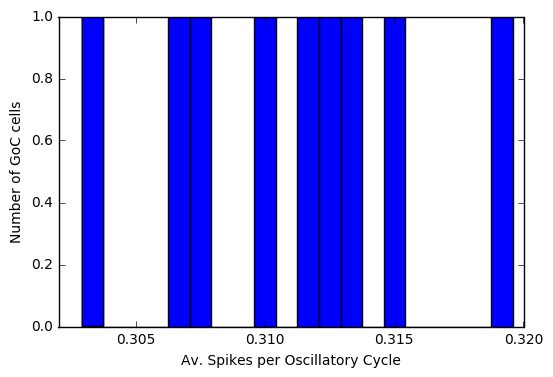

In [12]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the Golgi cells

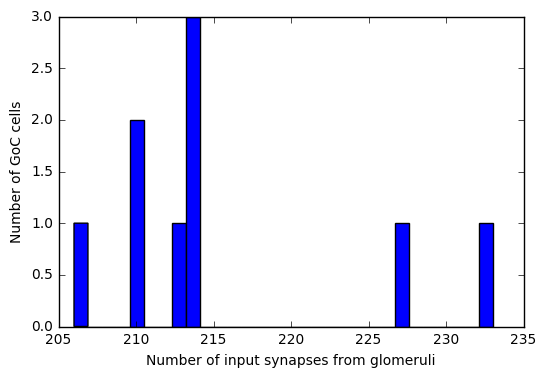

In [13]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['goclayer'].number_of_neurons
number_of_inputs = numpy.bincount(target_cell_index)
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of input synapses from glomeruli')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 80


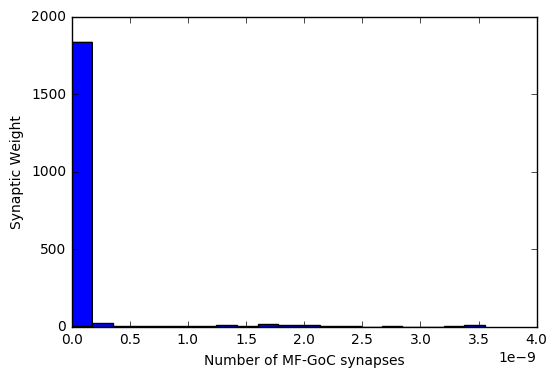

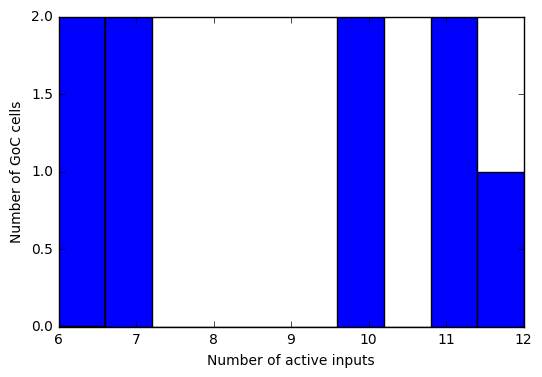

In [14]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Synaptic Weight')
plt.xlabel('Number of MF-GoC synapses')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)

Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GoC synapses also included in pattern 0 : 40
Number of active MF-GoC synapses also included in pattern 1 : 49
Number of active MF-GoC synapses also included in pattern 2 : 8
Number of active MF-GoC synapses also included in pattern 3 : 23


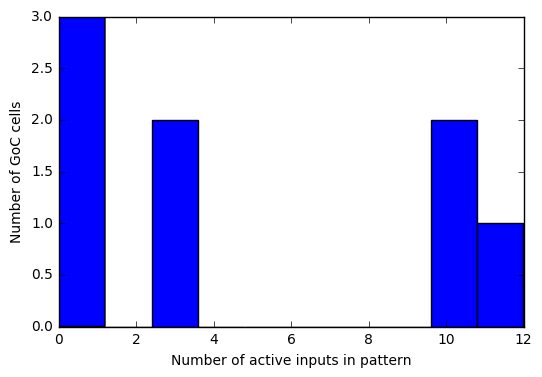

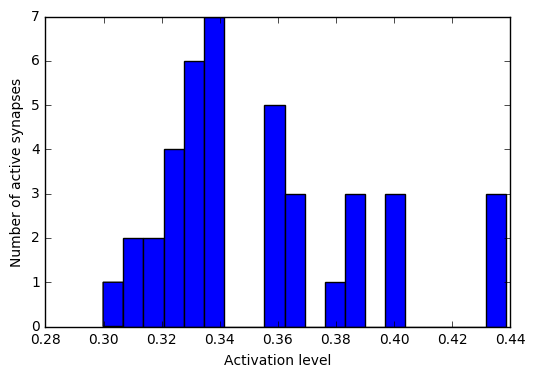

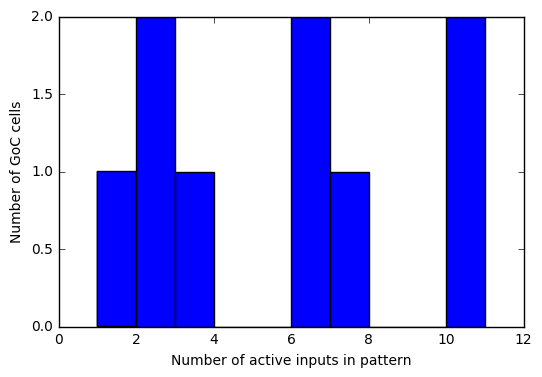

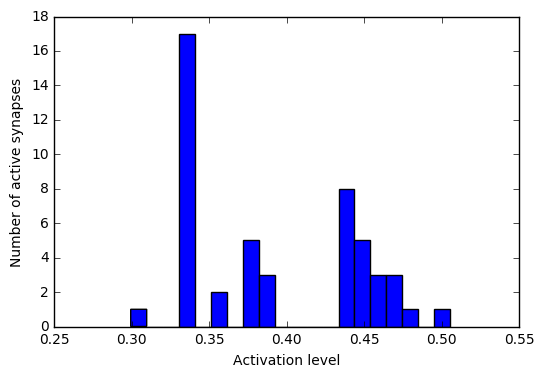

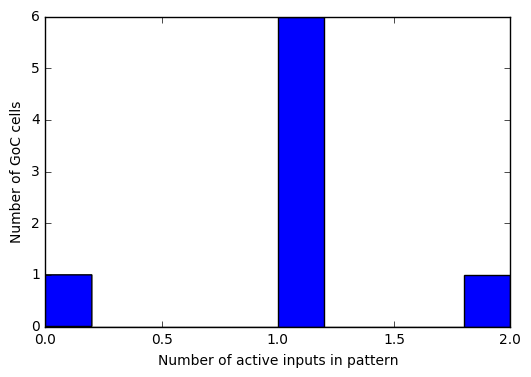

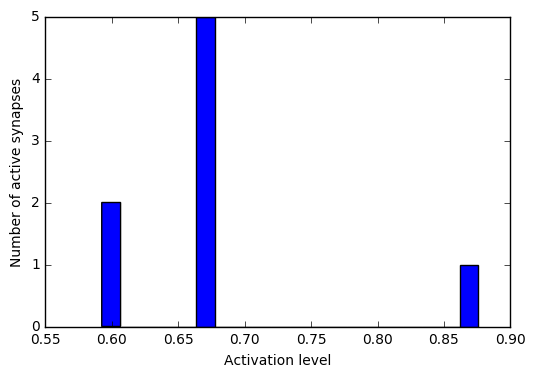

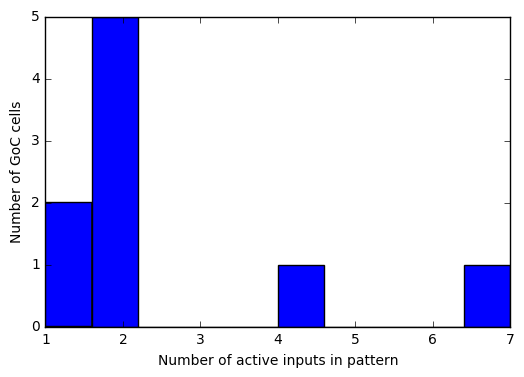

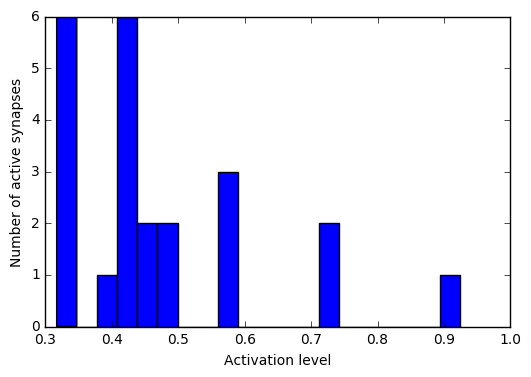

In [15]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GoC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GoC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

Represent the hit rate matrix of each GoC to each pattern

Average firing rate in MI analysis: 2.48768518519 Hz


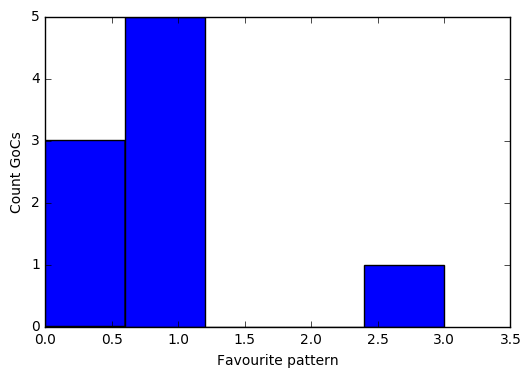

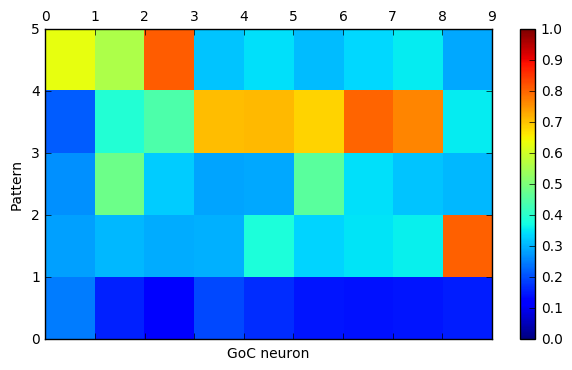

In [16]:
layer = 'goclayer'
window_length = simulation.config_options['hit_analysis']['window_length'] = simulation_time
time_bin = simulation.config_options['hit_analysis']['time_bin'] = 0.125

cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = analyze_activity(layer, window_length, time_bin)

#numpy.set_printoptions(threshold=numpy.nan)
#print 'Individual pattern hit matrix:'
#print hit_matrix
#print 'Individual pattern correct rejection matrix:'
#print cr_matrix
#print 'Individual pattern miss matrix:'
#print miss_matrix
#print 'Individual pattern false alarm matrix:'
#print fa_matrix
#print 'All patterns false alarm array:'
#print faa_matrix

extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)
plt.figure()
plt.hist(selected_pattern, bins=simulation.pattern_generator.number_of_patterns+1)
plt.ylabel('Count GoCs')
plt.xlabel('Favourite pattern')
cell_sorted = numpy.argsort(selected_pattern)
plt.figure()
plt.matshow(extended_hit[:,cell_sorted], extent=[0,simulation.cerebellum.get_number_of_elements(layer=layer),0,simulation.pattern_generator.number_of_patterns+1], vmin=0, vmax=1.0, aspect='auto')
plt.ylabel('Pattern')
plt.xlabel('GoC neuron')
plt.colorbar()

Estimate the goodness of the matrix

In [17]:
extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)

# Select those cells mainly responding to one of the patterns
ind = numpy.where(selected_pattern<simulation.pattern_generator.number_of_patterns)

diagonal = hit_matrix[selected_pattern[ind],ind]

# Create a new matrix setting the diagonal values to zero
zero_matrix = numpy.copy(hit_matrix)
zero_matrix[selected_pattern[ind],ind] = 0.0

# Calculate the average of the diagonal elements
av_selected = numpy.average(diagonal)
av_nonselected = numpy.sum(zero_matrix[:])/(simulation.cerebellum.get_number_of_elements(layer=layer)*(simulation.pattern_generator.number_of_patterns))
print 'Average hits of selected elements:',av_selected
print 'Average hits of non-selected elements:',av_nonselected
hit_index = av_selected - av_nonselected
print 'Hit index:',hit_index

Average hits of selected elements: 0.720832630068
Average hits of non-selected elements: 0.251916883641
Hit index: 0.468915746427


## PC activity analysis

Histogram of active synapses GrC-PC

In [18]:
target_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcpcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Number of GrC-PC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of PC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-PC:',numpy.count_nonzero(active_synapses)

KeyError: 'grcpcsynapsis'